In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

repair_data = pd.read_csv('../repairs.csv')
cache_data = pd.read_csv('../cache.csv')

In [31]:
repair_data.info()
repair_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3132 entries, 0 to 3131
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     3132 non-null   int64  
 1   ontology       3132 non-null   object 
 2   failed         3132 non-null   bool   
 3   failed_repair  3132 non-null   bool   
 4   steps          2200 non-null   float64
 5   time           2200 non-null   float64
 6   calls          2200 non-null   float64
 7   iic_mcs        2199 non-null   float64
 8   iic_remove     2188 non-null   float64
 9   inf_mcs        2199 non-null   float64
 10  inf_weakening  2199 non-null   float64
 11  inf_remove     2188 non-null   float64
dtypes: bool(2), float64(8), int64(1), object(1)
memory usage: 250.9+ KB


,Unnamed: 0,steps,time,calls,iic_mcs,iic_remove,inf_mcs,inf_weakening,inf_remove
count,3132.000000,2200.000000,2200.000000,2200.000000,2199.000000,2188.000000,2199.000000,2199.000000,2188.000000
mean,1565.500000,2.505909,6691.431818,6875.086818,0.519567,0.592829,2736.469304,2776.176899,2704.082724
std,904.274848,6.336477,22412.799799,8437.433987,0.366800,0.332428,3175.967175,3290.150268,3221.795026
min,0.000000,1.000000,605.000000,548.000000,0.000000,0.000000,120.000000,118.000000,120.000000
25%,782.750000,1.000000,1425.750000,2147.500000,0.134314,0.500000,457.000000,421.500000,395.750000
50%,1565.500000,1.000000,2116.000000,3987.000000,0.500000,0.500000,875.000000,876.000000,875.000000
75%,2348.250000,2.000000,3795.250000,8315.250000,0.903711,0.998972,5322.000000,5509.500000,5259.250000
max,3131.000000,143.000000,282936.000000,112949.000000,1.000000,1.000000,13386.000000,13822.000000,13591.000000


In [32]:
repair_data['Ontology'] = repair_data['ontology']
repair_data['Has failed'] = repair_data['failed'].map(
    {True: 'Yes', False: 'No'})
repair_data['Has failed weakening'] = repair_data['failed_repair'].map(
    {True: 'Yes', False: 'No'})
repair_data['Weakening steps'] = repair_data['steps']
repair_data['Repair time [ms]'] = repair_data['time']
repair_data['Reasoner calls'] = repair_data['calls']
repair_data['IIC w.r.t. maximal consistent subset'] = repair_data['iic_mcs']
repair_data['IIC w.r.t. repair by removal'] = repair_data['iic_remove']
repair_data['Inferred class hierarchy size (weakening)'] = repair_data['inf_weakening']
repair_data['Inferred class hierarchy size (mcs)'] = repair_data['inf_mcs']
repair_data['Inferred class hierarchy size (removal)'] = repair_data['inf_remove']

In [33]:
cache_data.info()
cache_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37791 entries, 0 to 37790
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  37791 non-null  int64  
 1   ontology    37791 non-null  object 
 2   reasoner    37791 non-null  object 
 3   size        37791 non-null  int64  
 4   type        37791 non-null  object 
 5   time        37791 non-null  float64
 6   calls       37791 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 2.0+ MB


,Unnamed: 0,size,time,calls
count,37791.000000,37791.000000,37791.000000,37791.000000
mean,18895.000000,16.332460,309.677654,7199.666524
std,10909.466348,23.338733,694.406608,11597.458895
min,0.000000,1.000000,0.000000,0.000000
25%,9447.500000,5.000000,29.050000,885.700000
50%,18895.000000,10.000000,81.400000,2324.800000
75%,28342.500000,20.000000,271.400000,7169.005000
max,37790.000000,100.000000,12190.000000,84194.000000


In [34]:
cache_data['Ontology'] = cache_data['ontology']
cache_data['Reasoner'] = cache_data['reasoner'].map(
    {'fact++': 'FaCT++', 'hermit': 'HermiT', 'jfact': 'JFact', 'openllet': 'Openllet'})
cache_data['Weakening steps'] = cache_data['size']
cache_data['Caching strategy'] = cache_data['type'].map(
    {'full': 'Caching using transitivity', 'basic': 'Simple caching', 'uncached': 'No caching'})
cache_data['Time per weakening [ms]'] = cache_data['time']
cache_data['Reasoner calls per weakening'] = cache_data['calls']

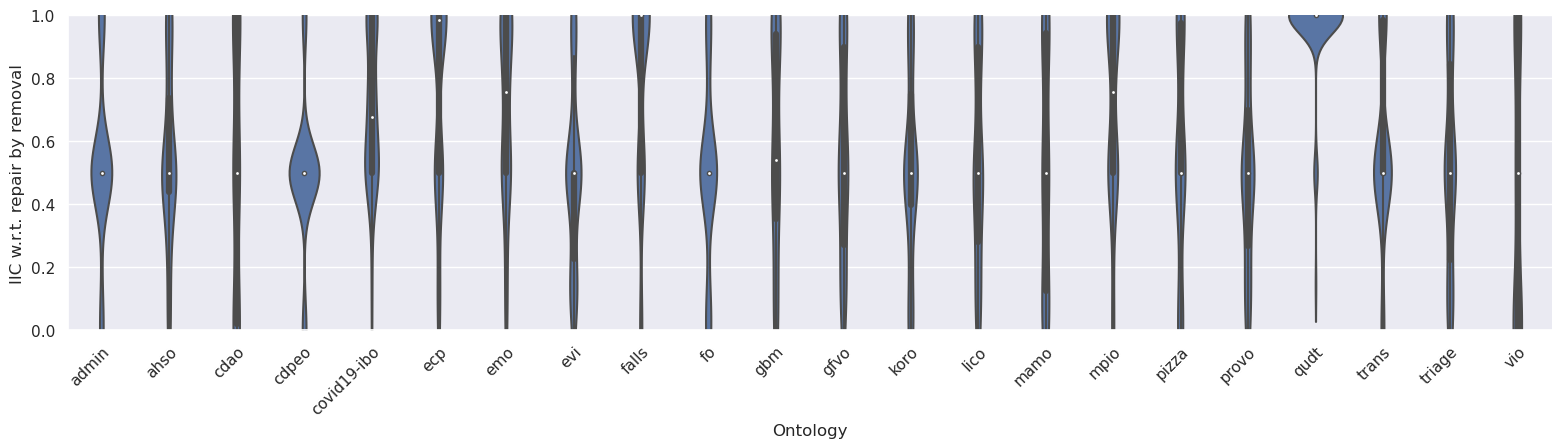

In [35]:
order = np.unique(repair_data['Ontology'])
sns.catplot(data=repair_data, kind='violin', x='Ontology',
            y='IIC w.r.t. repair by removal', height=4, aspect=4, color='b', order=order)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.ylim((0, 1))
plt.savefig('../../figures/iic-remove-ontology-violin.png', dpi=400, bbox_inches = "tight")

{'admin': (0.5327560975609756, (0.47878787878787876, 0.5867560975609756)), 'ahso': (0.555313173161211, (0.499597609798639, 0.6109897578380205)), 'cdao': (0.5276460631479941, (0.4475936981341434, 0.606204797865017)), 'cdpeo': (0.49845588235294114, (0.4547058823529412, 0.5428676470588235)), 'covid19-ibo': (0.6992939742018628, (0.65283207959711, 0.745475349154113)), 'ecp': (0.7419447085053658, (0.6791416646440896, 0.8024855918578302)), 'emo': (0.6910451800229203, (0.6325338196383788, 0.7478411508842291)), 'evi': (0.4936041530203961, (0.4386800057299403, 0.5486565764883372)), 'falls': (0.779777217483711, (0.7167190391509378, 0.8394810350068058)), 'fo': (0.5039133557684486, (0.44408472977177743, 0.5636824466828569)), 'gbm': (0.594126437963229, (0.5276556291992285, 0.6599710625763731)), 'gfvo': (0.5560784965905674, (0.4942630944222322, 0.6179116315113599)), 'koro': (0.5124629322694616, (0.4530962335234818, 0.5722791184106373)), 'lico': (0.548266729918797, (0.48409551910232296, 0.612244097543

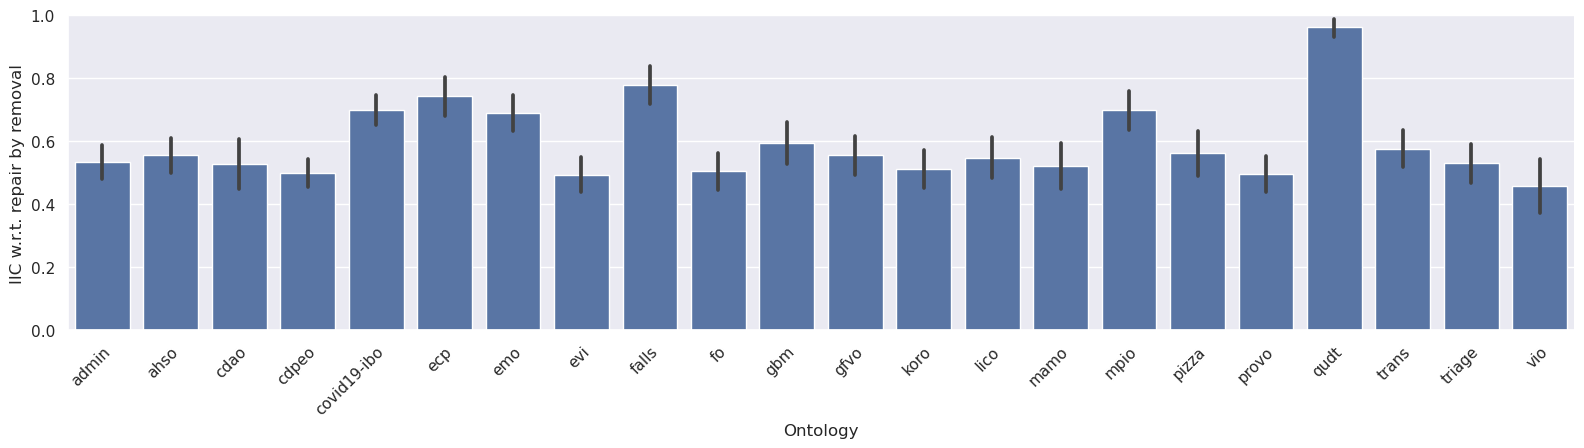

In [36]:
order = np.unique(repair_data['Ontology'])
facet = sns.catplot(data=repair_data, kind='bar', x='Ontology',
                    y='IIC w.r.t. repair by removal', height=4, aspect=4, color='b', order=order, n_boot=50_000, seed=10)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.ylim((0, 1))
plt.savefig('../../figures/iic-remove-ontology-bar.png', dpi=400, bbox_inches = "tight")
lower = [line.get_ydata().min() for line in facet.ax.lines]
upper = [line.get_ydata().max() for line in facet.ax.lines]
print({order[i]: (repair_data[repair_data['Ontology'] == order[i]]
      ['iic_remove'].mean(), ci) for i, ci in enumerate(zip(lower, upper))})

{'admin': (0.3866805656928564, (0.31295869407455784, 0.46262133571785696)), 'ahso': (0.5062382021302634, (0.44664214747591413, 0.5665436688893517)), 'cdao': (0.5258845591551965, (0.44912734991353337, 0.6026367053992215)), 'cdpeo': (0.21879702973514134, (0.16573220231506713, 0.2755329534219064)), 'covid19-ibo': (0.6294735352556385, (0.5782252854628297, 0.6798155192423804)), 'ecp': (0.3616732057104788, (0.28776414288655955, 0.43898292784074494)), 'emo': (0.6025854906855139, (0.5418991908621088, 0.662329322423891)), 'evi': (0.5918757818345141, (0.5317534505565786, 0.6513950260765787)), 'falls': (0.4935357468403362, (0.41709856994962347, 0.5704025052749557)), 'fo': (0.6954964295649319, (0.627080730625095, 0.7602416732379411)), 'gbm': (0.5158517649021739, (0.4495165758013686, 0.5830107429970793)), 'gfvo': (0.5429974724028777, (0.48594384627899595, 0.599912662492367)), 'koro': (0.36536678446084053, (0.2949365814143758, 0.43702616038707404)), 'lico': (0.5320824537885087, (0.46661173489002516,

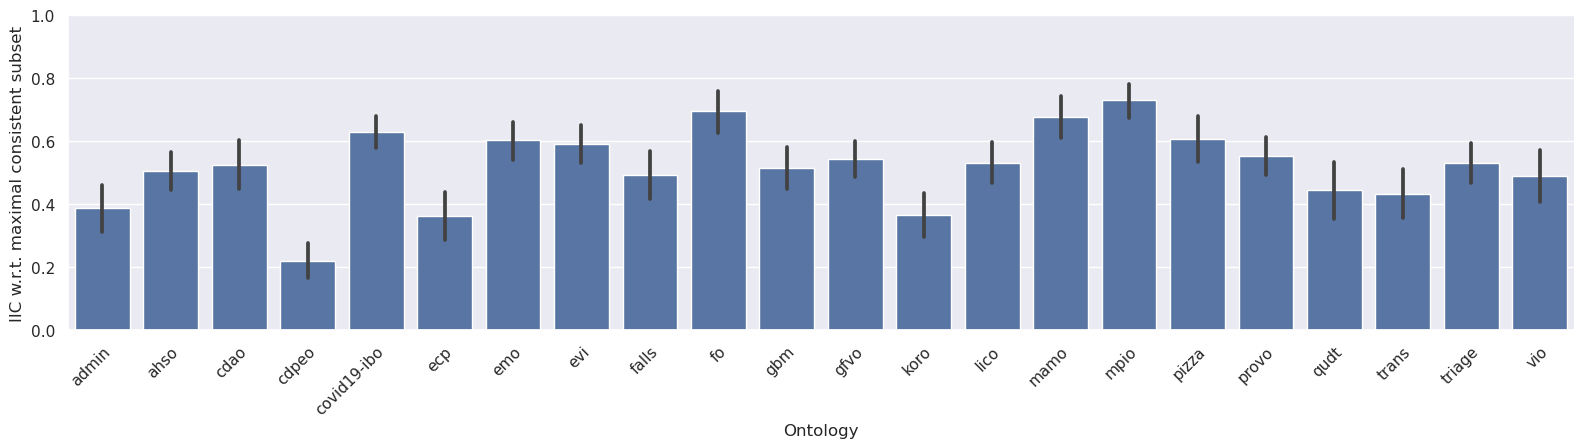

In [37]:
order = np.unique(repair_data['Ontology'])
facet = sns.catplot(data=repair_data, kind='bar', x='Ontology',
                    y='IIC w.r.t. maximal consistent subset', height=4, aspect=4, color='b', order=order, n_boot=50_000, seed=10)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.ylim((0, 1))
plt.savefig('../../figures/iic-mcs-ontology-bar.png', dpi=400, bbox_inches = "tight")
lower = [line.get_ydata().min() for line in facet.ax.lines]
upper = [line.get_ydata().max() for line in facet.ax.lines]
print({order[i]: (repair_data[repair_data['Ontology'] == order[i]]
      ['iic_mcs'].mean(), ci) for i, ci in enumerate(zip(lower, upper))})

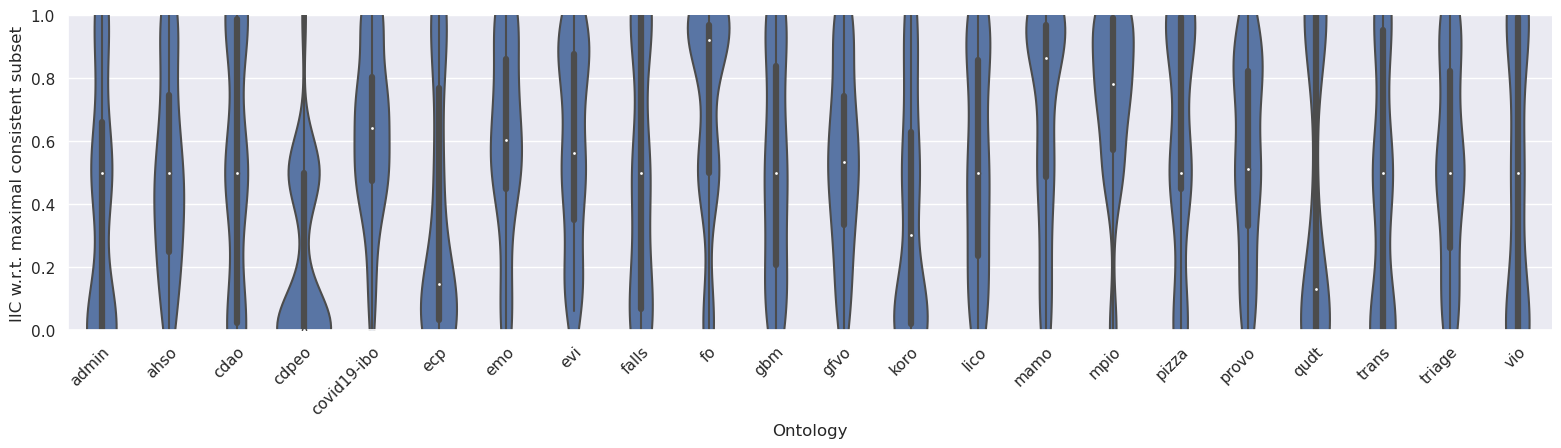

In [38]:
order = np.unique(repair_data['Ontology'])
sns.catplot(data=repair_data, kind='violin', x='Ontology',
            y='IIC w.r.t. maximal consistent subset', height=4, aspect=4, color='b', order=order)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.ylim((0, 1))
plt.savefig('../../figures/iic-mcs-ontology-violin.png', dpi=400, bbox_inches = "tight")

0.5928291020033971 ((0.5789711821381062, 0.6067271893002271),)
0.5195672214500293 ((0.5042115218287945, 0.5348646521380084),)


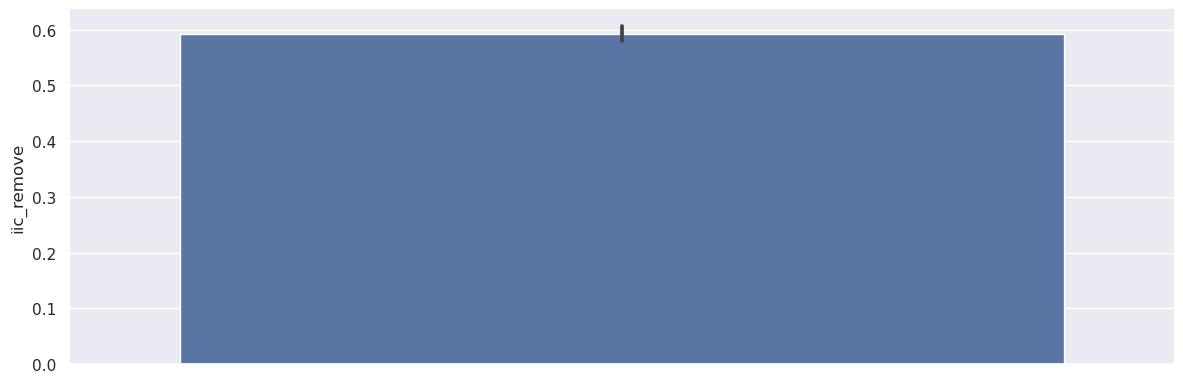

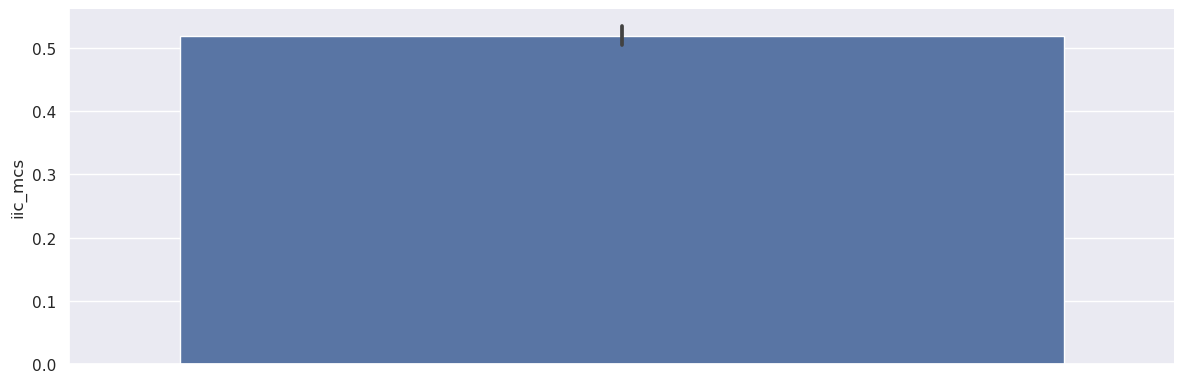

In [39]:
facet = sns.catplot(data=repair_data, kind='bar', y='iic_remove', height=4, aspect=3, color='b', order=order, n_boot=50_000, seed=10)
lower = [line.get_ydata().min() for line in facet.ax.lines]
upper = [line.get_ydata().max() for line in facet.ax.lines]
print(repair_data['iic_remove'].mean(), tuple(zip(lower, upper)))

facet = sns.catplot(data=repair_data, kind='bar', y='iic_mcs', height=4, aspect=3, color='b', order=order, n_boot=50_000, seed=10)
lower = [line.get_ydata().min() for line in facet.ax.lines]
upper = [line.get_ydata().max() for line in facet.ax.lines]
print(repair_data['iic_mcs'].mean(), tuple(zip(lower, upper)))

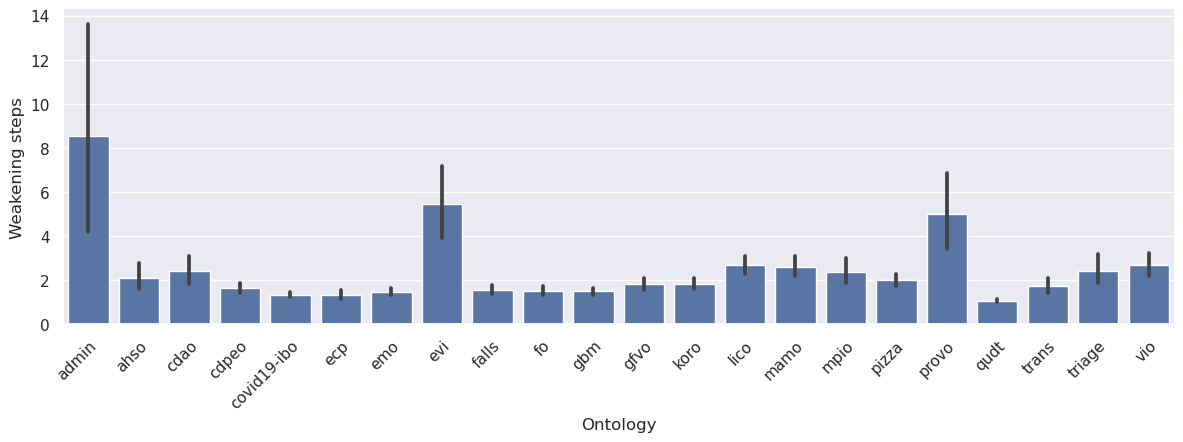

In [40]:
order = np.unique(repair_data['Ontology'])
sns.catplot(data=repair_data, kind='bar', x='Ontology',
            y='Weakening steps', height=4, aspect=3, color='b', order=order, n_boot=5_000, seed=10)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.savefig('../../figures/steps-ontology-bar.png', dpi=400, bbox_inches = "tight")

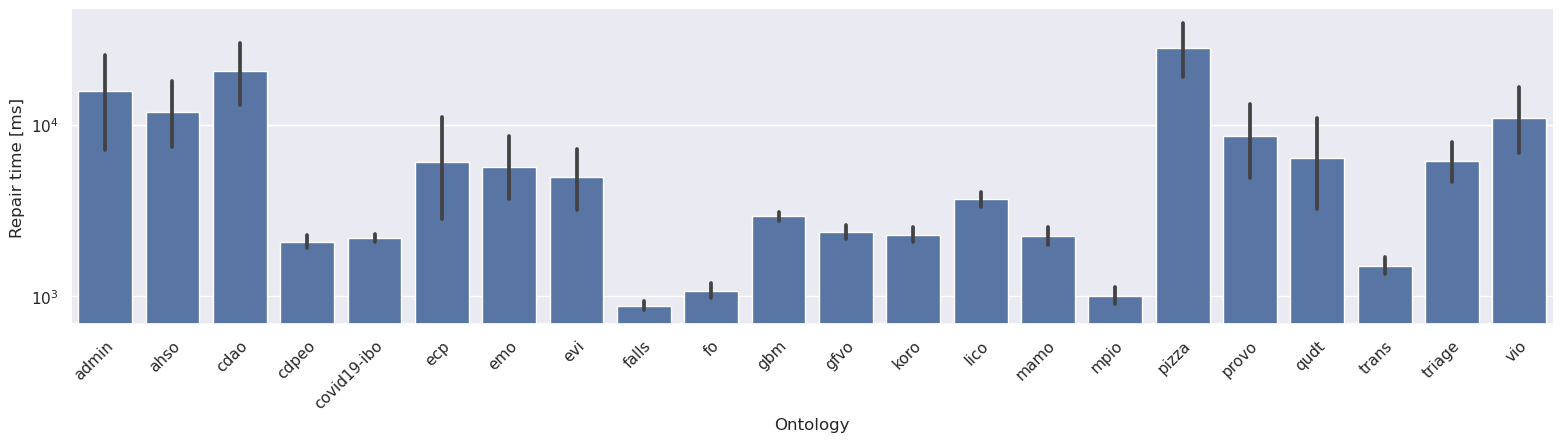

In [41]:
order = np.unique(repair_data['Ontology'])
sns.catplot(data=repair_data, kind='bar', x='Ontology',
            y='Repair time [ms]', height=4, aspect=4, color='b', order=order, n_boot=5_000, seed=10)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.yscale('log')
plt.savefig('../../figures/time-ontology-bar.png', dpi=400, bbox_inches = "tight")

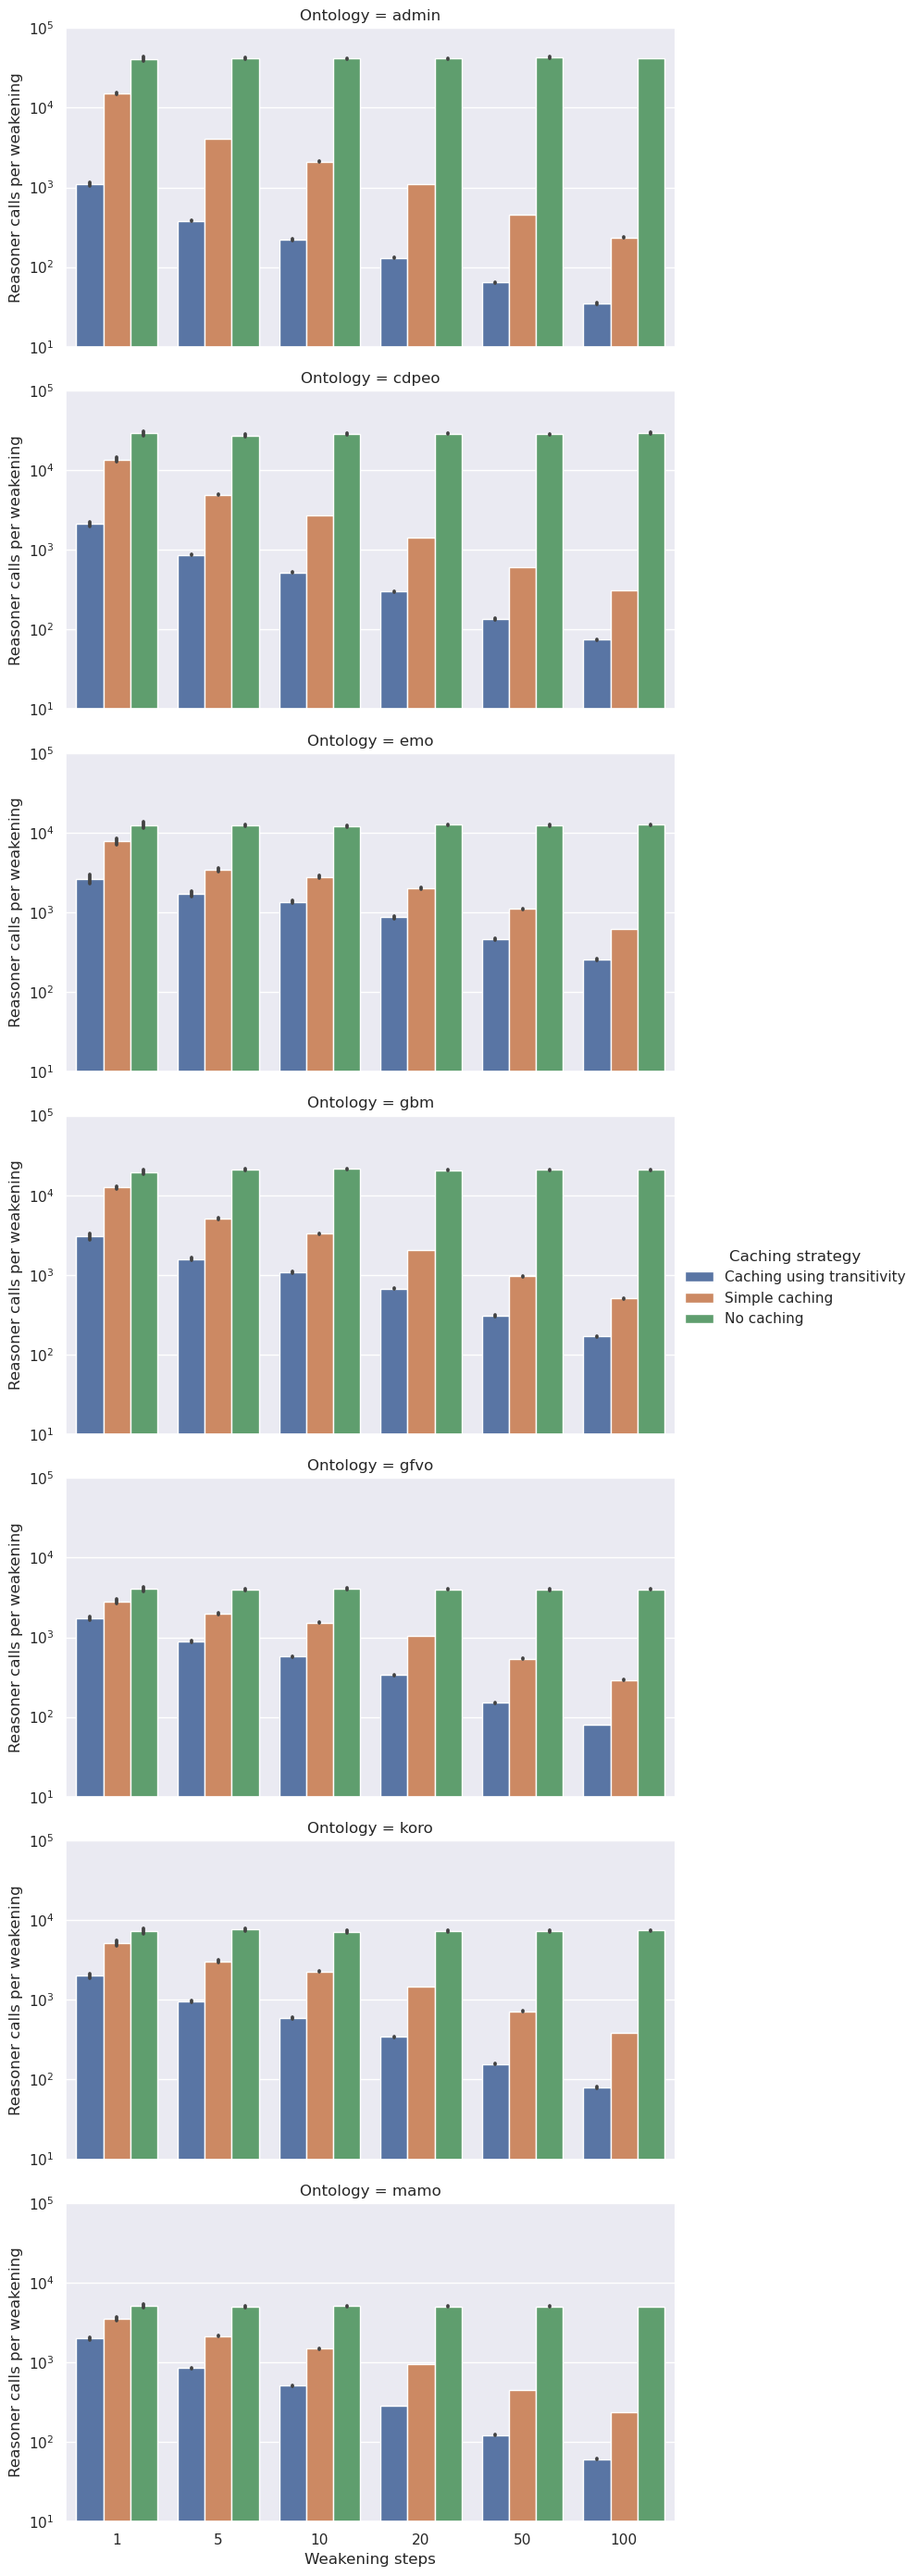

In [42]:
row_order = np.unique(cache_data['Ontology'])
order = pd.Index(['Caching using transitivity', 'Simple caching',
                 'No caching'], name='Caching strategy')
g = sns.catplot(data=cache_data, kind='bar', x='Weakening steps', y='Reasoner calls per weakening',
                hue='Caching strategy', row='Ontology', height=4, aspect=2, hue_order=order, row_order=row_order, n_boot=5_000, seed=10)
plt.yscale('log')
plt.ylim((10, 10**5))
plt.savefig('../../figures/calls-cache-ontology-bar.png', dpi=400, bbox_inches = "tight")

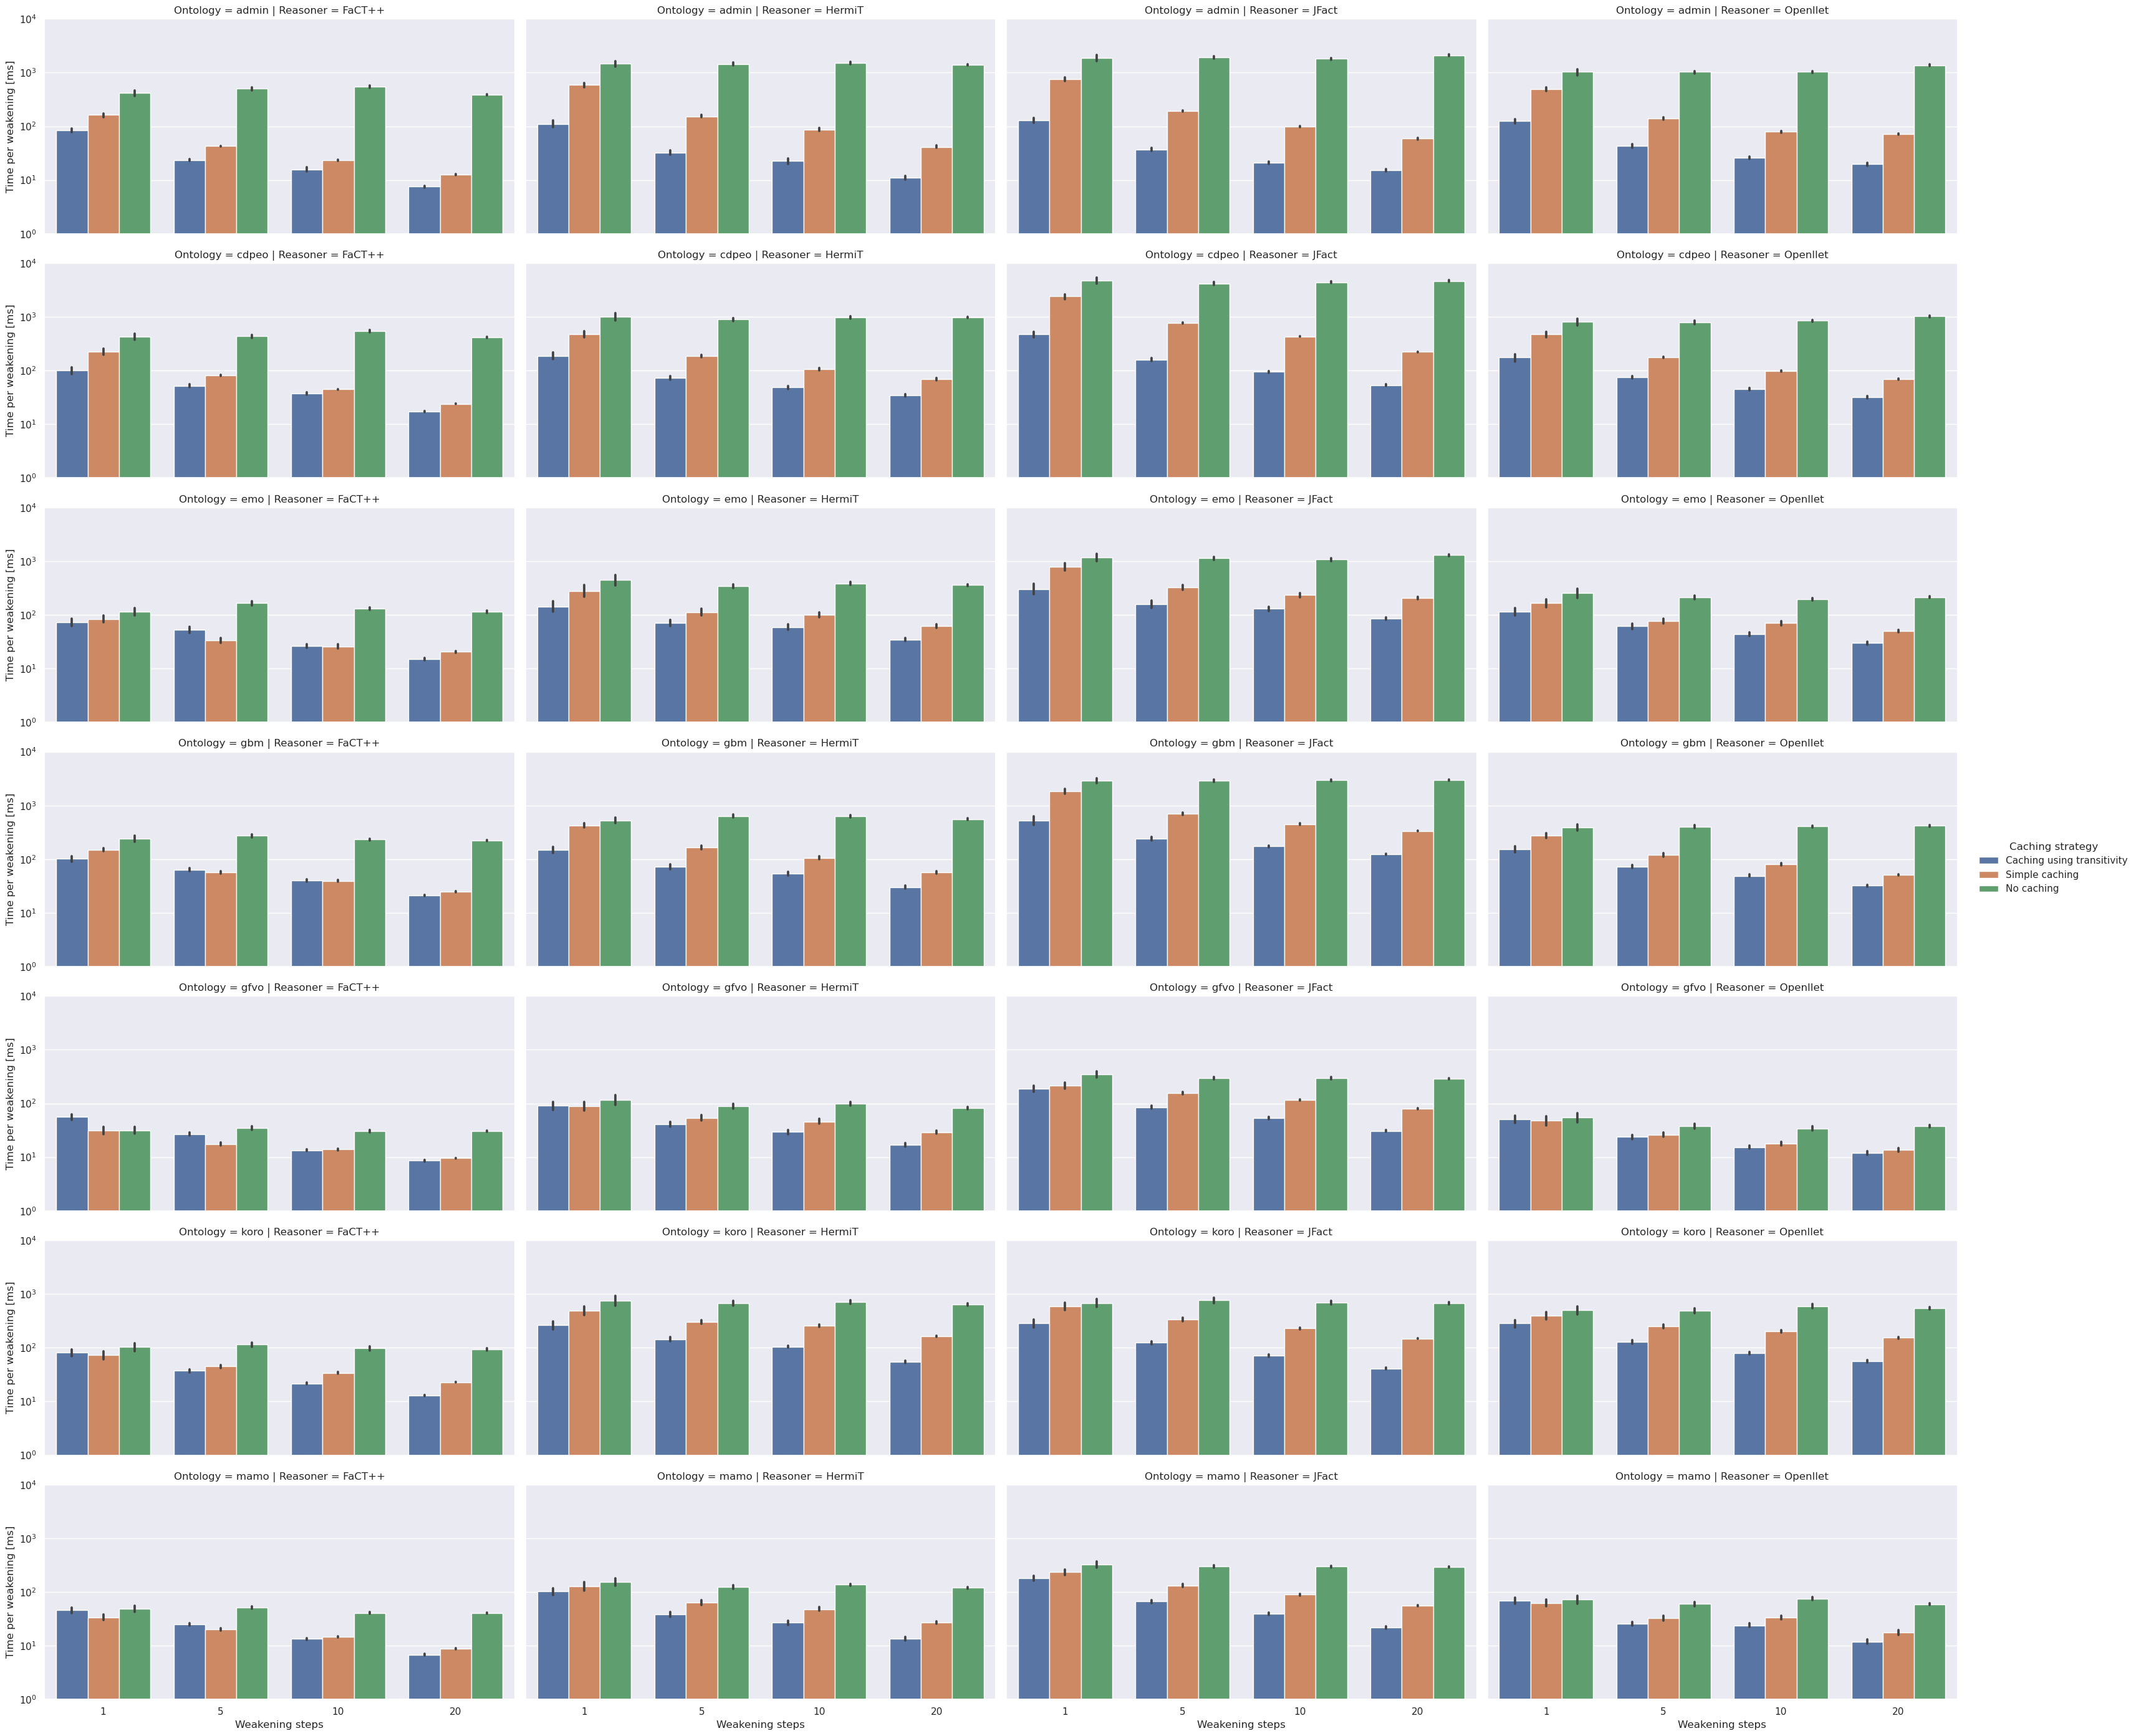

In [43]:
row_order = np.unique(cache_data['Ontology'])
order = pd.Index(['Caching using transitivity', 'Simple caching',
                 'No caching'], name='Caching strategy')
sns.catplot(data=cache_data[cache_data['size'] <= 20], kind='bar', x='Weakening steps', y='Time per weakening [ms]',
            hue='Caching strategy', row='Ontology', col='Reasoner', height=4, aspect=2, hue_order=order, row_order=row_order, n_boot=5_000, seed=10)
plt.yscale('log')
plt.ylim((1, 10**4))
plt.savefig('../../figures/time-cache-ontology-reasoner-bar.png', dpi=400, bbox_inches = "tight")

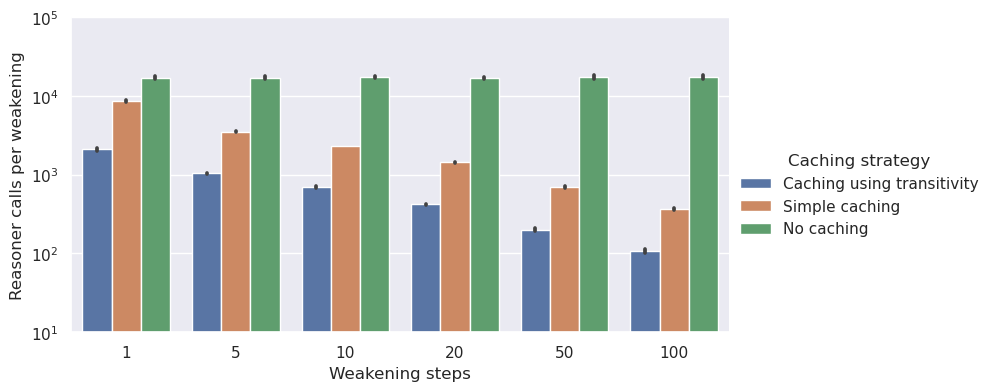

In [44]:
order = pd.Index(['Caching using transitivity', 'Simple caching',
                 'No caching'], name='Caching strategy')
sns.catplot(data=cache_data, kind='bar', x='Weakening steps', y='Reasoner calls per weakening',
            hue='Caching strategy', height=4, aspect=2, hue_order=order, n_boot=5_000, seed=10)
plt.yscale('log')
plt.ylim((10, 10**5))
plt.savefig('../../figures/calls-cache-bar.png', dpi=400, bbox_inches = "tight")

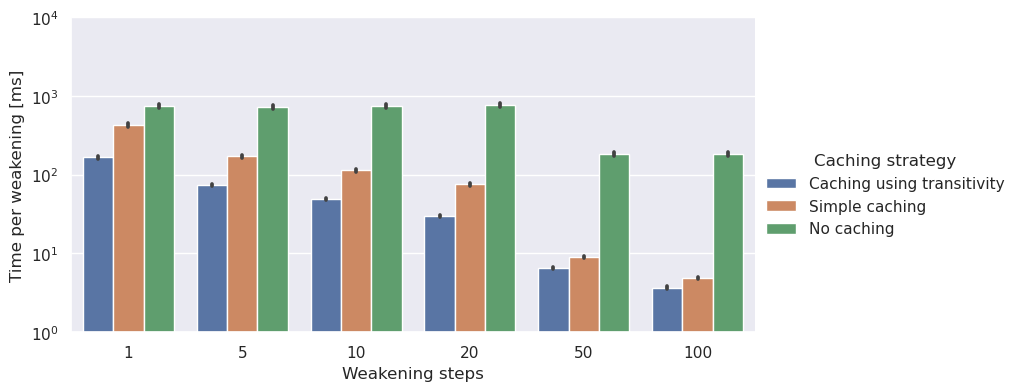

In [45]:
order = pd.Index(['Caching using transitivity', 'Simple caching',
                 'No caching'], name='Caching strategy')
sns.catplot(data=cache_data, kind='bar', x='Weakening steps',
            y='Time per weakening [ms]', hue='Caching strategy', height=4, aspect=2, hue_order=order, n_boot=5_000, seed=10)
plt.yscale('log')
plt.ylim((1, 10**4))
plt.savefig('../../figures/time-cache-bar.png', dpi=400, bbox_inches = "tight")